# Gender Classification

**importing necessary libraries**

In [6]:
import cv2
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 

**downloading dataset from kaggle**

In [1]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d cashutosh/gender-classification-dataset

 94% 253M/269M [00:01<00:00, 171MB/s]
100% 269M/269M [00:01<00:00, 155MB/s]


In [ ]:
#unzipping the file
!unzip /content/gender-classification-dataset.zip -d /content/

In [3]:
train_path = '/content/Training'
valid_path = '/content/Validation'

In [4]:
#basic parameters
size = 224
batch_size = 64

**reading all the images for training and validation**

In [7]:
#ImageDataGenerator for reading images for training and validation
train_datagen = ImageDataGenerator(
    rescale = 1./255, 
    shear_range = 0.2, 
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_path, 
    target_size = (size, size),
    batch_size = batch_size,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    valid_path,
    target_size = (size, size),
    batch_size = batch_size, 
    class_mode = 'binary'
)

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


##building the classifier from scratch

In [29]:
model = Sequential()

#first layer
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(size,size,3)))
model.add(MaxPool2D())

#second layer
model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

#third layer
model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

#final layer
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 28, 28, 64)      

In [30]:
model.compile(optimizer = 'adam' , loss = 'mse' , metrics = ['accuracy'])

**some callbacks**

In [33]:
#saving the best model
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='/content/final_model.h5', 
                               verbose=1, save_best_only=True)

In [34]:
history = model.fit(train_generator, epochs = 10, steps_per_epoch = 256 , validation_data = validation_generator, callbacks=[checkpointer])

Epoch 1/10
256/256 [==============================] - 209s 817ms/step - loss: 0.1046 - accuracy: 0.8581 - val_loss: 0.0658 - val_accuracy: 0.9135

Epoch 00001: val_loss improved from inf to 0.06583, saving model to /content/final_model.h5
Epoch 2/10
256/256 [==============================] - 209s 816ms/step - loss: 0.0829 - accuracy: 0.8926 - val_loss: 0.0675 - val_accuracy: 0.9122

Epoch 00002: val_loss did not improve from 0.06583
Epoch 3/10
256/256 [==============================] - 208s 812ms/step - loss: 0.0742 - accuracy: 0.9026 - val_loss: 0.0537 - val_accuracy: 0.9294

Epoch 00003: val_loss improved from 0.06583 to 0.05365, saving model to /content/final_model.h5
Epoch 4/10
256/256 [==============================] - 208s 814ms/step - loss: 0.0673 - accuracy: 0.9103 - val_loss: 0.0515 - val_accuracy: 0.9302

Epoch 00004: val_loss improved from 0.05365 to 0.05148, saving model to /content/final_model.h5
Epoch 5/10
256/256 [==============================] - 208s 811ms/step - loss:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


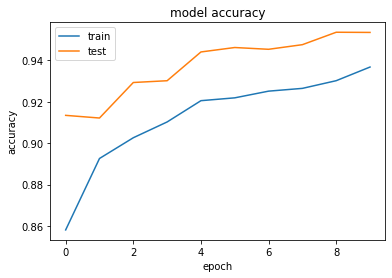

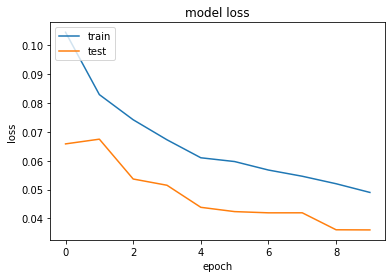

In [49]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [68]:
sample = cv2.imread('/content/female1.jpg.jpg')
sample = cv2.resize(sample, (224, 224))
sample = np.expand_dims(sample, axis = 0)

labels = ['female', 'male']
labels[int(model.predict(sample)[0][0])]

'female'